# Import Libraries

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the image

In [6]:
img = cv2.cvtColor(cv2.imread('original_images/robot_image1.jpg'), cv2.COLOR_BGR2RGB)

## Image rezolution

In [7]:
img.shape

(2160, 3840, 3)

## Show image

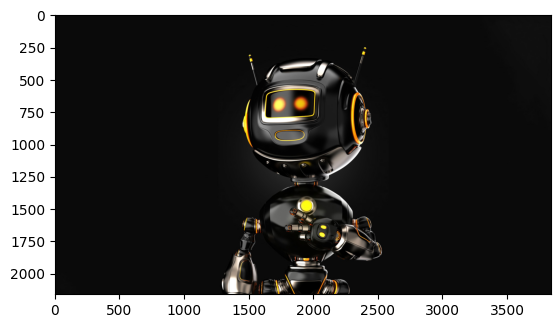

In [8]:
plt.imshow(img)

## Break image into seperate channels: <font color='red'>Red</font>, <font color='green'>Green</font> and <font color='blue'>Blue</font>

In [9]:
r, g, b = cv2.split(img)

## Normalize the channels
Value between 0 and 1

In [10]:
r, g, b = r / 255, g / 255, b /255

Visualize the channels

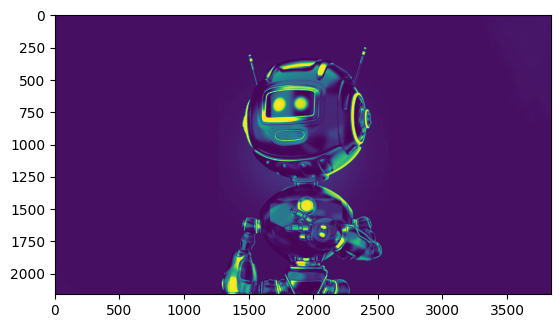

In [18]:
plt.imshow(r)

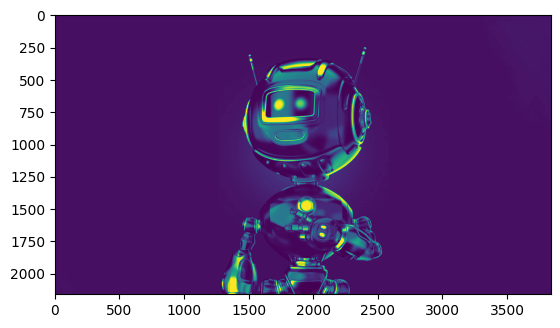

In [12]:
plt.imshow(g)

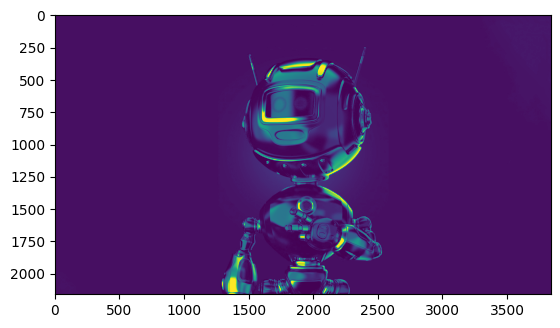

In [13]:
plt.imshow(b)

## Compressing the rows of the image

In [39]:
pca_components = 50

pca_r = PCA(n_components=pca_components)
reduced_r = pca_r.fit_transform(r)

pca_g = PCA(n_components=pca_components)
reduced_g = pca_g.fit_transform(g)

pca_b = PCA(n_components=pca_components)
reduced_b = pca_b.fit_transform(b)

In [23]:
combined = np.array([reduced_r, reduced_g, reduced_b])
combined.shape

(3, 2160, 50)

In [40]:
reconstructed_r = pca_r.inverse_transform(reduced_r)
reconstructed_g = pca_g.inverse_transform(reduced_g)
reconstructed_b = pca_b.inverse_transform(reduced_b)

In [41]:
img_reconstructed = (cv2.merge((reconstructed_r, reconstructed_g, reconstructed_b)))

Reducing the image from 3840 dims to 200 gives us represetntativ image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


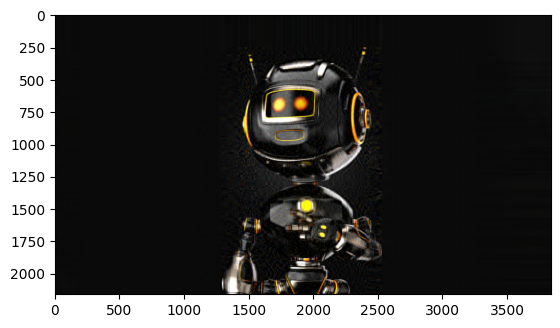

In [42]:
plt.imshow(img_reconstructed)